In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
data = pd.read_csv("charting-m-points-2020s.csv", encoding='ISO-8859-1')

C:\Users\ugurs\AppData\Local\Temp\ipykernel_18040\3081555339.py:1: DtypeWarning: Columns (8,9,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("charting-m-points-2020s.csv", encoding='ISO-8859-1')
C:\Users\ugurs\AppData\Local\Temp\ipykernel_18040\3081555339.py:1: DtypeWarning: Columns (8,9,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("charting-m-points-2020s.csv", encoding='ISO-8859-1')


In [4]:
data = data.drop(['Gm1', 'Gm2','Set1','Set2','Gm#','Pts'], axis=1)

In [5]:
data.columns

Index(['match_id', 'Pt', 'TbSet', 'TB?', 'TBpt', 'Svr', 'Ret', 'Serving',
       '1st', '2nd', 'Notes', '1stSV', '2ndSV', '1stIn', '2ndIn', 'isAce',
       'isUnret', 'isRallyWinner', 'isForced', 'isUnforced', 'isDouble',
       'PtWinner', 'isSvrWinner', 'rallyCount'],
      dtype='object')

Index(['match_id', 'Pt', 'TbSet', 'TB?', 'TBpt', 'Svr', 'Ret', 'Serving',
       '1st', '2nd', 'Notes', '1stSV', '2ndSV', '1stIn', '2ndIn', 'isAce',
       'isUnret', 'isRallyWinner', 'isForced', 'isUnforced', 'isDouble',
       'PtWinner', 'isSvrWinner', 'rallyCount'],
      dtype='object')

In [6]:
data = data.drop(['TbSet', 'TB?', 'TBpt','Svr', 'Ret', 'Notes'], axis=1)

In [7]:
data= data.drop(['1stSV', '2ndSV'], axis=1)

In [8]:
first_djokovic = data.iloc[:384]

In [9]:
def get_forehand_shots_server(match_id, shot_sequences):
    # Initialize DataFrame to store results
    df = pd.DataFrame(columns=['match_id', 'forehand_shot', 'previous_shot'])
    
    for point_sequence in shot_sequences:
        # Ensure point_sequence is a string
        if not isinstance(point_sequence, str):
            raise ValueError("point_sequence must be a string")
        
        # Find all shots
        shots = re.findall(r'([fbrsvzopuylmhijktq][^fbrsvzopuylmhijktq]*)', point_sequence)
        
        # Since Djokovic is serving, his shots are every second shot starting from the second shot in the sequence
        djokovic_shots = shots[1::2]  # Djokovic's shots
        opponent_shots = shots[0::2]  # Opponent's shots, for getting the previous shots
        
        for i, shot in enumerate(djokovic_shots):
            if shot.startswith('f'):  # If it's a Djokovic forehand shot
                # Identify the previous shot
                previous_shot = opponent_shots[i] if i < len(opponent_shots) else 'NA'
                
                # Add the details to the DataFrame
                df = df.append({
                    'match_id': match_id,
                    'forehand_shot': shot,
                    'previous_shot': previous_shot
                }, ignore_index=True)
    
    return df

In [10]:
djokovic_serving_df = first_djokovic[first_djokovic['Serving'] == 'ND']

In [11]:
djokovic_serving_df

,match_id,Pt,Serving,1st,2nd,1stIn,2ndIn,isAce,isUnret,isRallyWinner,isForced,isUnforced,isDouble,PtWinner,isSvrWinner,rallyCount
0,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,1,ND,6f2n#,NaN,1,NaN,False,False,False,True,False,False,1,1,1
1,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,2,ND,4n,6b19f1b2s1f+3f2j2*,0,1.0,False,False,True,False,False,False,2,0,8
2,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,3,ND,4d,4b+28f2o1*,0,1.0,False,False,True,False,False,False,2,0,4
3,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,4,ND,6s28f3*,NaN,1,NaN,False,False,True,False,False,False,1,1,3
4,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,5,ND,4b37b-3*,NaN,1,NaN,False,False,True,False,False,False,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,20230905-M-US_Open-QF-Novak_Djokovic_-Taylor_F...,179,ND,6f1d#,NaN,1,NaN,False,False,False,True,False,False,1,1,1
380,20230905-M-US_Open-QF-Novak_Djokovic_-Taylor_F...,180,ND,6b27f-3m2o1*,NaN,1,NaN,False,False,True,False,False,False,1,1,5
381,20230905-M-US_Open-QF-Novak_Djokovic_-Taylor_F...,181,ND,4n,5b39b2f2f1f2f2b3b3b3b3d@,0,1.0,False,False,False,False,True,False,2,0,10
382,20230905-M-US_Open-QF-Novak_Djokovic_-Taylor_F...,182,ND,4f2d#,NaN,1,NaN,False,False,False,True,False,False,1,1,1


,match_id,Pt,Serving,1st,2nd,1stIn,2ndIn,isAce,isUnret,isRallyWinner,isForced,isUnforced,isDouble,PtWinner,isSvrWinner,rallyCount
0,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,1,ND,6f2n#,NaN,1,NaN,False,False,False,True,False,False,1,1,1
1,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,2,ND,4n,6b19f1b2s1f+3f2j2*,0,1.0,False,False,True,False,False,False,2,0,8
2,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,3,ND,4d,4b+28f2o1*,0,1.0,False,False,True,False,False,False,2,0,4
3,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,4,ND,6s28f3*,NaN,1,NaN,False,False,True,False,False,False,1,1,3
4,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,5,ND,4b37b-3*,NaN,1,NaN,False,False,True,False,False,False,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,20230905-M-US_Open-QF-Novak_Djokovic_-Taylor_F...,179,ND,6f1d#,NaN,1,NaN,False,False,False,True,False,False,1,1,1
380,20230905-M-US_Open-QF-Novak_Djokovic_-Taylor_F...,180,ND,6b27f-3m2o1*,NaN,1,NaN,False,False,True,False,False,False,1,1,5
381,20230905-M-US_Open-QF-Novak_Djokovic_-Taylor_F...,181,ND,4n,5b39b2f2f1f2f2b3b3b3b3d@,0,1.0,False,False,False,False,True,False,2,0,10
382,20230905-M-US_Open-QF-Novak_Djokovic_-Taylor_F...,182,ND,4f2d#,NaN,1,NaN,False,False,False,True,False,False,1,1,1


In [12]:
shot_sequences = []

# Iterate over each row in the DataFrame
for index, row in djokovic_serving_df.iterrows():
    # Check if '1st' column is not NaN (not empty)
    if pd.notna(row['1st']):
        shot_sequences.append(str(row['1st']))
    # Check if '2nd' column is not NaN (not empty) and add to the list
    if pd.notna(row['2nd']):
        shot_sequences.append(str(row['2nd']))

# Now, shot_sequences list contains all the non-empty shot sequences from '1st' and '2nd' columns


In [13]:
first_forehand_analysis = get_forehand_shots_server('20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton',shot_sequences)

In [14]:
first_forehand_analysis

,match_id,forehand_shot,previous_shot
0,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f1,b19
1,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f2,f+3
2,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f2,b+28
3,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f3*,s28
4,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f3,s29
...,...,...,...
202,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f3,f28
203,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f-3,b27
204,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f1,f2
205,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f2,f2


,match_id,forehand_shot,previous_shot
0,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f1,b19
1,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f2,f+3
2,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f2,b+28
3,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f3*,s28
4,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f3,s29
...,...,...,...
202,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f3,f28
203,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f-3,b27
204,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f1,f2
205,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f2,f2


In [15]:
def analyze_all_djokovic_forehands(data):
    # Initialize DataFrame to store the results from all matches
    all_forehands_df = pd.DataFrame(columns=['match_id', 'forehand_shot', 'previous_shot'])
    
    # Identify unique matches in the dataset
    unique_matches = data['match_id'].unique()
    
    for match_id in unique_matches:
        # Filter for Djokovic serving points in the current match
        match_data = data[(data['match_id'] == match_id) & (data['Serving'] == 'ND')]
        
        # Compile shot sequences for the current match
        shot_sequences = []
        for index, row in match_data.iterrows():
            if pd.notna(row['1st']):
                shot_sequences.append(str(row['1st']))
            if pd.notna(row['2nd']):
                shot_sequences.append(str(row['2nd']))
        
        # Analyze forehand shots for the current match
        match_forehands_df = get_forehand_shots_server(match_id, shot_sequences)
        
        # Append the results to the all_forehands_df DataFrame
        all_forehands_df = pd.concat([all_forehands_df, match_forehands_df], ignore_index=True)
    
    return all_forehands_df

In [16]:
djokovic_matches = data[data['match_id'].str.contains('Djokovic', flags=re.IGNORECASE, regex=True)]

In [17]:
def analyze_all_server_forehands(data, server_id):
    all_forehands_df = pd.DataFrame(columns=['match_id', 'forehand_shot', 'previous_shot'])
    
    # Identify unique matches in Djokovic's filtered dataset
    unique_matches = data['match_id'].unique()
    
    for match_id in unique_matches:
        # Filter for Djokovic serving points in the current match
        match_data = data[(data['match_id'] == match_id) & (data['Serving'] == server_id)]
        
        shot_sequences = []
        for index, row in match_data.iterrows():
            if pd.notna(row['1st']):
                shot_sequences.append(str(row['1st']))
            if pd.notna(row['2nd']):
                shot_sequences.append(str(row['2nd']))
        
        # If there are shot sequences to analyze, proceed
        if shot_sequences:
            match_forehands_df = get_forehand_shots_server(match_id, shot_sequences)
            all_forehands_df = pd.concat([all_forehands_df, match_forehands_df], ignore_index=True)
    
    return all_forehands_df


In [18]:
all_djokovic_forehands_analysis = analyze_all_server_forehands(djokovic_matches, 'ND')

In [19]:
all_djokovic_forehands_analysis

,match_id,forehand_shot,previous_shot
0,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f1,b19
1,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f2,f+3
2,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f2,b+28
3,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f3*,s28
4,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f3,s29
...,...,...,...
6724,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,f+18,b28
6725,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,f18,b28
6726,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,f28,f18
6727,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,f39,f18


,match_id,forehand_shot,previous_shot
0,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f1,b19
1,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f2,f+3
2,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f2,b+28
3,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f3*,s28
4,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f3,s29
...,...,...,...
6724,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,f+18,b28
6725,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,f18,b28
6726,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,f28,f18
6727,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,f39,f18


In [20]:
def get_shots_server(match_id, shot_sequences):
    # Initialize DataFrame to store results
    df = pd.DataFrame(columns=['match_id', 'shot_type', 'shot_sequence', 'previous_shot'])
    
    for point_sequence in shot_sequences:
        # Ensure point_sequence is a string
        if not isinstance(point_sequence, str):
            raise ValueError("point_sequence must be a string")
        
        # Find all shots
        shots = re.findall(r'([fbrsvzopuylmhijktq][^fbrsvzopuylmhijktq]*)', point_sequence)
        
        # Server's shots are every second shot starting from the second shot in the sequence
        server_shots = shots[1::2]
        opponent_shots = shots[0::2]  # For identifying the preceding shot
        
        for i, shot in enumerate(server_shots):
            shot_type = shot[0]  # The first character indicates the shot type
            previous_shot = opponent_shots[i] if i < len(opponent_shots) else 'NA'
            
            # Add the details to the DataFrame
            df = df.append({
                'match_id': match_id,
                'shot_type': shot_type,
                'shot_sequence': shot,
                'previous_shot': previous_shot
            }, ignore_index=True)
    
    return df


In [21]:
def analyze_all_server_shots(data, server_id):
    all_shots_df = pd.DataFrame(columns=['match_id', 'shot_type', 'shot_sequence', 'previous_shot'])
    
    # Identify unique matches in the dataset
    unique_matches = data['match_id'].unique()
    
    for match_id in unique_matches:
        # Filter for server's serving points in the current match
        match_data = data[(data['match_id'] == match_id) & (data['Serving'] == server_id)]
        
        shot_sequences = []
        for index, row in match_data.iterrows():
            if pd.notna(row['1st']):
                shot_sequences.append(str(row['1st']))
            if pd.notna(row['2nd']):
                shot_sequences.append(str(row['2nd']))
        
        # If there are shot sequences to analyze, proceed
        if shot_sequences:
            match_shots_df = get_shots_server(match_id, shot_sequences)
            all_shots_df = pd.concat([all_shots_df, match_shots_df], ignore_index=True)
    
    return all_shots_df


In [22]:
all_djokovic_shots = analyze_all_server_shots(djokovic_matches, 'ND')

In [23]:
all_djokovic_shots.describe()

,match_id,shot_type,shot_sequence,previous_shot
count,13908,13908,13908,13908
unique,85,17,672,241
top,20230716-M-Wimbledon-F-Novak_Djokovic-Carlos_A...,f,b3,b3
freq,361,6729,1659,1383


,match_id,shot_type,shot_sequence,previous_shot
count,13908,13908,13908,13908
unique,85,17,672,241
top,20230716-M-Wimbledon-F-Novak_Djokovic-Carlos_A...,f,b3,b3
freq,361,6729,1659,1383


In [24]:
djokovic_returning = djokovic_matches[djokovic_matches['Serving'] != 'ND']


In [25]:
def get_shots_returner(match_id, shot_sequences):
    # Initialize DataFrame to store results
    df = pd.DataFrame(columns=['match_id', 'shot_type', 'shot_sequence', 'previous_shot'])
    
    for point_sequence in shot_sequences:
        # Ensure point_sequence is a string
        if not isinstance(point_sequence, str):
            raise ValueError("point_sequence must be a string")
        
        # Find all shots
        shots = re.findall(r'([fbrsvzopuylmhijktq][^fbrsvzopuylmhijktq]*)', point_sequence)
        
        # When Djokovic is the returner, his shots are every second shot starting from the first shot in the sequence
        # However, the first return shot is excluded from the analysis
        djokovic_shots = shots[2::2]  # Skip the first return shot, then take every second shot
        opponent_shots = shots[1::2]  # Opponent's shots, for identifying the preceding shot
        
        for i, shot in enumerate(djokovic_shots):
            shot_type = shot[0]  # The first character indicates the shot type
            # Adjust index to get the correct preceding shot
            previous_shot = opponent_shots[i] if i < len(opponent_shots) else 'NA'
            
            # Add the details to the DataFrame
            df = df.append({
                'match_id': match_id,
                'shot_type': shot_type,
                'shot_sequence': shot,
                'previous_shot': previous_shot
            }, ignore_index=True)
    
    return df


In [26]:
def analyze_all_returner_shots(data, server_id):
    all_returner_shots_df = pd.DataFrame(columns=['match_id', 'shot_type', 'shot_sequence', 'previous_shot'])
    
    # Identify unique matches in Djokovic's dataset
    unique_matches = data['match_id'].unique()
    
    for match_id in unique_matches:
        # Filter for points in the current match where Djokovic is not serving
        match_data = data[(data['match_id'] == match_id) & (data['Serving'] != server_id)]
        
        shot_sequences = []
        for index, row in match_data.iterrows():
            if pd.notna(row['1st']):
                shot_sequences.append(str(row['1st']))
            if pd.notna(row['2nd']):
                shot_sequences.append(str(row['2nd']))
        
        # If there are shot sequences to analyze, proceed
        if shot_sequences:
            match_shots_df = get_shots_returner(match_id, shot_sequences)
            all_returner_shots_df = pd.concat([all_returner_shots_df, match_shots_df], ignore_index=True)
    
    return all_returner_shots_df

In [27]:
all_djokovic_not_serving_shots = analyze_all_returner_shots(djokovic_matches, 'ND')

In [28]:
all_djokovic_not_serving_shots.describe()

,match_id,shot_type,shot_sequence,previous_shot
count,12507,12507,12507,12507
unique,86,18,602,297
top,20230413-M-Monte_Carlo_Masters-R16-Novak_Djoko...,f,b3,b3
freq,389,5187,1613,1678


,match_id,shot_type,shot_sequence,previous_shot
count,12507,12507,12507,12507
unique,86,18,602,297
top,20230413-M-Monte_Carlo_Masters-R16-Novak_Djoko...,f,b3,b3
freq,389,5187,1613,1678


In [29]:
combined_djokovic_shots = pd.concat([all_djokovic_shots, all_djokovic_not_serving_shots], ignore_index=True)

In [30]:
combined_djokovic_shots.describe()

,match_id,shot_type,shot_sequence,previous_shot
count,26415,26415,26415,26415
unique,86,18,850,354
top,20200202-M-Australian_Open-F-Novak_Djokovic-Do...,f,b3,b3
freq,597,11916,3272,3061


,match_id,shot_type,shot_sequence,previous_shot
count,26415,26415,26415,26415
unique,86,18,850,354
top,20200202-M-Australian_Open-F-Novak_Djokovic-Do...,f,b3,b3
freq,597,11916,3272,3061


In [31]:
def get_return(match_id, shot_sequences):
    # Initialize DataFrame to store results for return shots and their preceding serves
    df = pd.DataFrame(columns=['match_id', 'return_shot_sequence', 'preceding_serve'])
    
    for point_sequence in shot_sequences:
        # Ensure point_sequence is a string
        if not isinstance(point_sequence, str):
            raise ValueError("point_sequence must be a string")
        
        # Extract the serve, which is not marked by rally shot indicators, and the first return shot
        # Looking for a pattern where the serve is directly followed by a rally shot sequence
        matches = re.findall(r'(\d)([fbrsvzopuylmhijktq][^fbrsvzopuylmhijktq]*)', point_sequence)
        
        if matches:
            # Assuming the first tuple found contains the serve and the first return shot
            serve, return_shot = matches[0]
            
            # Add the details to the DataFrame
            df = df.append({
                'match_id': match_id,
                'return_shot_sequence': return_shot,
                'preceding_serve': serve
            }, ignore_index=True)
    
    return df


In [32]:
def analyze_all_return_serves(data, server_id):
    all_return_serves_df = pd.DataFrame(columns=['match_id', 'return_shot_sequence', 'preceding_serve'])
    
    # Identify unique matches in the dataset
    unique_matches = data['match_id'].unique()
    
    for match_id in unique_matches:
        # Filter for points in the current match where Djokovic is not serving
        match_data = data[(data['match_id'] == match_id) & (data['Serving'] != server_id)]
        
        shot_sequences = []
        for index, row in match_data.iterrows():
            # Combine '1st' and '2nd' shots into the sequence list if they're not NaN
            if pd.notna(row['1st']):
                shot_sequences.append(str(row['1st']))
            if pd.notna(row['2nd']):
                shot_sequences.append(str(row['2nd']))
        
        # If there are shot sequences to analyze, proceed
        if shot_sequences:
            match_return_serves_df = get_return(match_id, shot_sequences)
            all_return_serves_df = pd.concat([all_return_serves_df, match_return_serves_df], ignore_index=True)
    
    return all_return_serves_df


In [33]:
djokovic_returns = analyze_all_return_serves(djokovic_matches, 'ND')

In [34]:
djokovic_returns = djokovic_returns[djokovic_returns['preceding_serve'].isin(['4', '5', '6'])]
djokovic_returns.head(5)

,match_id,return_shot_sequence,preceding_serve
0,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f3d#,4
1,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f2d#,6
3,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,b17w#,4
4,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f18,4
6,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f2d@,4


,match_id,return_shot_sequence,preceding_serve
0,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f3d#,4
1,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f2d#,6
3,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,b17w#,4
4,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f18,4
6,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f2d@,4


In [35]:
def get_serves_server(match_id, shot_sequences):
    # Initialize DataFrame to store results
    df = pd.DataFrame(columns=['match_id', 'serve_sequence'])
    
    for point_sequence in shot_sequences:
        # Ensure point_sequence is a string
        if not isinstance(point_sequence, str):
            raise ValueError("point_sequence must be a string")
        
        # Try to find the first occurrence of any rally shot indicator
        serve_match = re.search(r'([fbrsvzopuylmhijktq])', point_sequence)
        
        if serve_match:
            # If a rally shot indicator is found, extract everything before it as the serve sequence
            serve_sequence = point_sequence[:serve_match.start()]
        else:
            # If no rally shot indicator is found, the entire sequence is considered the serve
            serve_sequence = point_sequence
        
        # Add the details to the DataFrame
        df = df.append({'match_id': match_id, 'serve_sequence': serve_sequence}, ignore_index=True)
    
    return df


In [36]:
serves = get_serves_server(1, shot_sequences)

In [37]:
def analyze_all_first_serves(data, server_id):
    all_first_serves_df = pd.DataFrame(columns=['match_id', 'serve_sequence'])
    
    unique_matches = data['match_id'].unique()
    
    for match_id in unique_matches:
        # Filter for Djokovic's serving points in the current match for first serves
        match_data = data[(data['match_id'] == match_id) & (data['Serving'] == server_id)]
        
        # Extract first serve sequences
        first_serve_sequences = match_data['1st'].dropna().astype(str).tolist()
        
        # Analyze first serves using the get_serves_server function
        if first_serve_sequences:
            match_first_serves_df = get_serves_server(match_id, first_serve_sequences)
            all_first_serves_df = pd.concat([all_first_serves_df, match_first_serves_df], ignore_index=True)
    
    return all_first_serves_df


In [38]:
def analyze_all_second_serves(data, server_id):
    all_second_serves_df = pd.DataFrame(columns=['match_id', 'serve_sequence'])
    
    unique_matches = data['match_id'].unique()
    
    for match_id in unique_matches:
        # Filter for Djokovic's serving points in the current match for second serves
        match_data = data[(data['match_id'] == match_id) & (data['Serving'] == server_id)]
        
        # Extract second serve sequences
        second_serve_sequences = match_data['2nd'].dropna().astype(str).tolist()
        
        # Analyze second serves using the get_serves_server function
        if second_serve_sequences:
            match_second_serves_df = get_serves_server(match_id, second_serve_sequences)
            all_second_serves_df = pd.concat([all_second_serves_df, match_second_serves_df], ignore_index=True)
    
    return all_second_serves_df


In [39]:
novak_first_serves = analyze_all_first_serves(djokovic_matches, 'ND')

In [40]:
novak_first_serves.describe()

,match_id,serve_sequence
count,7573,7573
unique,85,70
top,20230716-M-Wimbledon-F-Novak_Djokovic-Carlos_A...,4
freq,184,1844


,match_id,serve_sequence
count,7573,7573
unique,85,70
top,20230716-M-Wimbledon-F-Novak_Djokovic-Carlos_A...,4
freq,184,1844


In [41]:
novak_second_serves = analyze_all_second_serves(djokovic_matches, 'ND')

In [42]:
novak_second_serves.describe()

,match_id,serve_sequence
count,2597,2597
unique,85,31
top,20230716-M-Wimbledon-F-Novak_Djokovic-Carlos_A...,4
freq,66,784


,match_id,serve_sequence
count,2597,2597
unique,85,31
top,20230716-M-Wimbledon-F-Novak_Djokovic-Carlos_A...,4
freq,66,784


In [43]:
sinner_matches = data[data['match_id'].str.contains('Sinner', flags=re.IGNORECASE, regex=True)]

In [44]:
sinner_matches

,match_id,Pt,Serving,1st,2nd,1stIn,2ndIn,isAce,isUnret,isRallyWinner,isForced,isUnforced,isDouble,PtWinner,isSvrWinner,rallyCount
3832,20230813-M-Canada_Masters-F-Jannik_Sinner-Alex...,1,JS,c4f28b29f17f27b29b29f;38b3z^17r-1w#,NaN,1,NaN,False,False,False,True,False,False,2,0,10
3833,20230813-M-Canada_Masters-F-Jannik_Sinner-Alex...,2,JS,4f3w#,NaN,1,NaN,False,False,False,True,False,False,1,1,1
3834,20230813-M-Canada_Masters-F-Jannik_Sinner-Alex...,3,JS,4d,5f2n@,0,1.0,False,False,False,False,True,False,1,1,1
3835,20230813-M-Canada_Masters-F-Jannik_Sinner-Alex...,4,JS,4s1n#,NaN,1,NaN,False,False,False,True,False,False,1,1,1
3836,20230813-M-Canada_Masters-F-Jannik_Sinner-Alex...,5,JS,6d,6b28f39b37f-18l2d#,0,1.0,False,False,False,True,False,False,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239478,20200122-M-Australian_Open-R64-Jannik_Sinner-M...,185,MF,4+s37i^37s-2n#,NaN,1,NaN,False,False,False,True,False,False,2,1,3
239479,20200122-M-Australian_Open-R64-Jannik_Sinner-M...,186,JS,5f29b29f28b38b38b39b17f2d#,NaN,1,NaN,False,False,False,True,False,False,2,0,8
239480,20200122-M-Australian_Open-R64-Jannik_Sinner-M...,187,JS,4n,5b28f19f39b29s39b29f19l28o=19*,0,1.0,False,False,True,False,False,False,2,0,10
239481,20200122-M-Australian_Open-R64-Jannik_Sinner-M...,188,JS,4d,6b18f1n@,0,1.0,False,False,False,False,True,False,2,0,2


,match_id,Pt,Serving,1st,2nd,1stIn,2ndIn,isAce,isUnret,isRallyWinner,isForced,isUnforced,isDouble,PtWinner,isSvrWinner,rallyCount
3832,20230813-M-Canada_Masters-F-Jannik_Sinner-Alex...,1,JS,c4f28b29f17f27b29b29f;38b3z^17r-1w#,NaN,1,NaN,False,False,False,True,False,False,2,0,10
3833,20230813-M-Canada_Masters-F-Jannik_Sinner-Alex...,2,JS,4f3w#,NaN,1,NaN,False,False,False,True,False,False,1,1,1
3834,20230813-M-Canada_Masters-F-Jannik_Sinner-Alex...,3,JS,4d,5f2n@,0,1.0,False,False,False,False,True,False,1,1,1
3835,20230813-M-Canada_Masters-F-Jannik_Sinner-Alex...,4,JS,4s1n#,NaN,1,NaN,False,False,False,True,False,False,1,1,1
3836,20230813-M-Canada_Masters-F-Jannik_Sinner-Alex...,5,JS,6d,6b28f39b37f-18l2d#,0,1.0,False,False,False,True,False,False,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239478,20200122-M-Australian_Open-R64-Jannik_Sinner-M...,185,MF,4+s37i^37s-2n#,NaN,1,NaN,False,False,False,True,False,False,2,1,3
239479,20200122-M-Australian_Open-R64-Jannik_Sinner-M...,186,JS,5f29b29f28b38b38b39b17f2d#,NaN,1,NaN,False,False,False,True,False,False,2,0,8
239480,20200122-M-Australian_Open-R64-Jannik_Sinner-M...,187,JS,4n,5b28f19f39b29s39b29f19l28o=19*,0,1.0,False,False,True,False,False,False,2,0,10
239481,20200122-M-Australian_Open-R64-Jannik_Sinner-M...,188,JS,4d,6b18f1n@,0,1.0,False,False,False,False,True,False,2,0,2


In [45]:
all_sinner_shots = analyze_all_server_shots(sinner_matches, 'JS')

In [46]:
all_sinner_not_serving_shots = analyze_all_returner_shots(sinner_matches, 'JS')

In [47]:
combined_sinner_shots = pd.concat([all_sinner_shots, all_sinner_not_serving_shots], ignore_index=True)

In [48]:
sinner_returns = analyze_all_return_serves(sinner_matches, 'JS')

In [49]:
sinner_returns = sinner_returns[sinner_returns['preceding_serve'].isin(['4', '5', '6'])]

In [50]:
sinner_first_serves = analyze_all_first_serves(sinner_matches, 'JS')

In [51]:
sinner_second_serves = analyze_all_second_serves(sinner_matches, 'JS')

In [52]:
combined_sinner_shots.describe()

,match_id,shot_type,shot_sequence,previous_shot
count,24654,24654,24654,24654
unique,97,17,842,339
top,20230601-M-Roland_Garros-R64-Jannik_Sinner-Dan...,f,b3,b3
freq,708,11889,2481,2019


,match_id,shot_type,shot_sequence,previous_shot
count,24654,24654,24654,24654
unique,97,17,842,339
top,20230601-M-Roland_Garros-R64-Jannik_Sinner-Dan...,f,b3,b3
freq,708,11889,2481,2019


In [53]:
sinner_returns.describe()

,match_id,return_shot_sequence,preceding_serve
count,6709,6709,6709
unique,97,236,3
top,20230601-M-Roland_Garros-R64-Jannik_Sinner-Dan...,b28,4
freq,178,658,2855


,match_id,return_shot_sequence,preceding_serve
count,6709,6709,6709
unique,97,236,3
top,20230601-M-Roland_Garros-R64-Jannik_Sinner-Dan...,b28,4
freq,178,658,2855


In [54]:
sinner_first_serves.describe()

,match_id,serve_sequence
count,7808,7808
unique,97,70
top,20220907-M-US_Open-QF-Jannik_Sinner-Carlos_Alc...,4
freq,213,1867


,match_id,serve_sequence
count,7808,7808
unique,97,70
top,20220907-M-US_Open-QF-Jannik_Sinner-Carlos_Alc...,4
freq,213,1867


In [55]:
sinner_second_serves.describe()

,match_id,serve_sequence
count,3197,3197
unique,97,32
top,20220907-M-US_Open-QF-Jannik_Sinner-Carlos_Alc...,5
freq,98,1845


,match_id,serve_sequence
count,3197,3197
unique,97,32
top,20220907-M-US_Open-QF-Jannik_Sinner-Carlos_Alc...,5
freq,98,1845


In [56]:
combined_djokovic_shots

,match_id,shot_type,shot_sequence,previous_shot
0,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f,f1,b19
1,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,s,s1,b2
2,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f,f2,f+3
3,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f,f2,b+28
4,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f,f3*,s28
...,...,...,...,...
26410,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,f,f1d@,f17
26411,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,r,r2d#,b29
26412,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,b,b29,b39
26413,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,f,f29,f18


,match_id,shot_type,shot_sequence,previous_shot
0,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f,f1,b19
1,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,s,s1,b2
2,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f,f2,f+3
3,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f,f2,b+28
4,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,f,f3*,s28
...,...,...,...,...
26410,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,f,f1d@,f17
26411,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,r,r2d#,b29
26412,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,b,b29,b39
26413,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,f,f29,f18


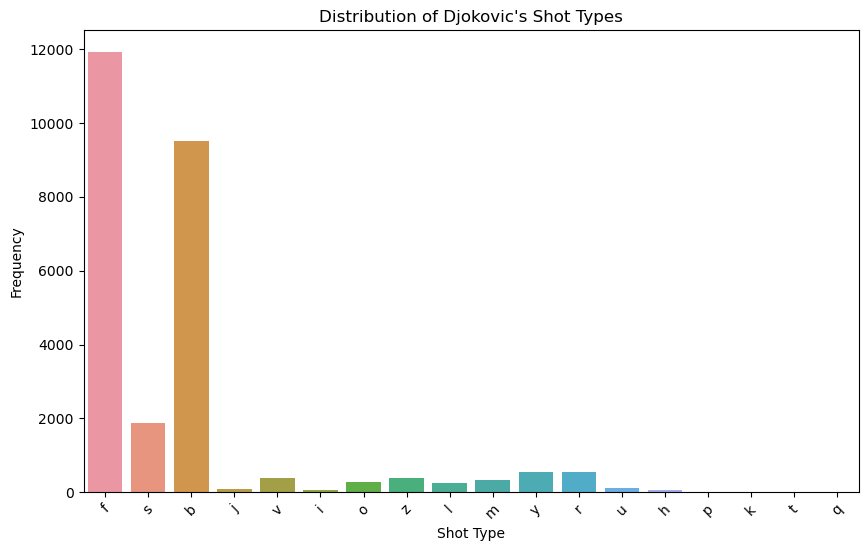

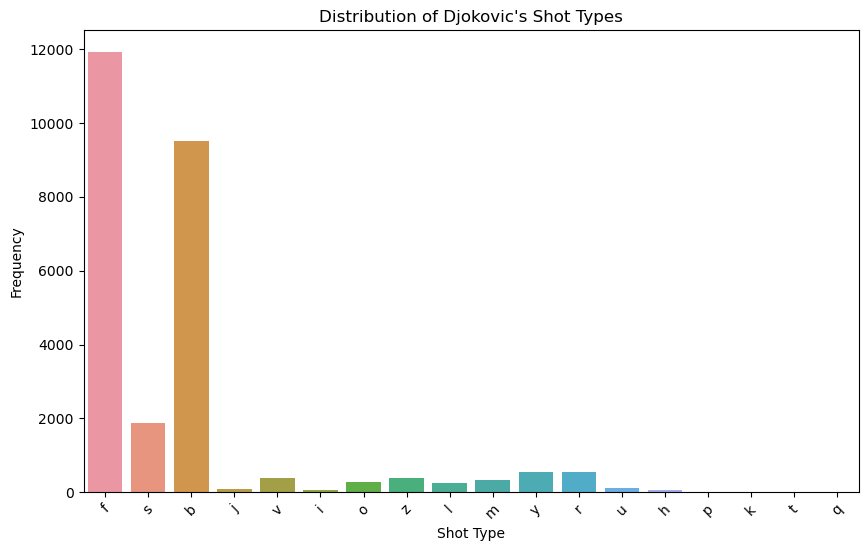

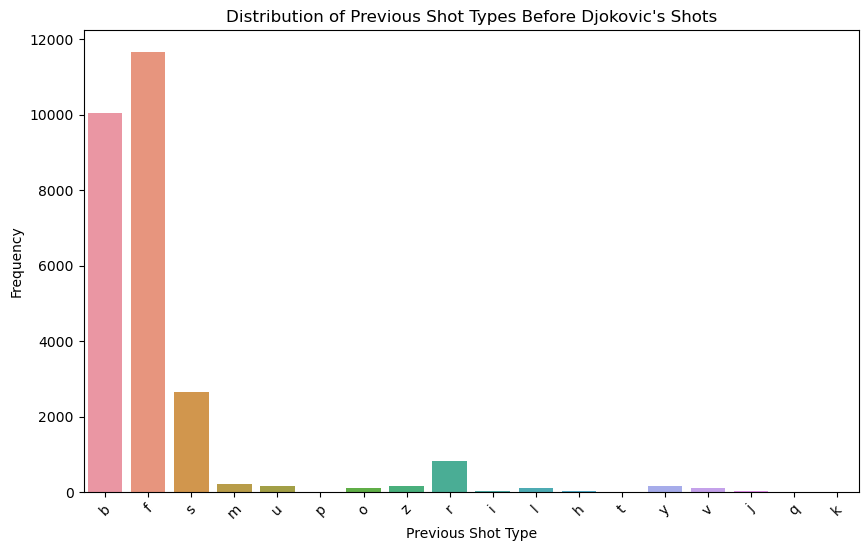

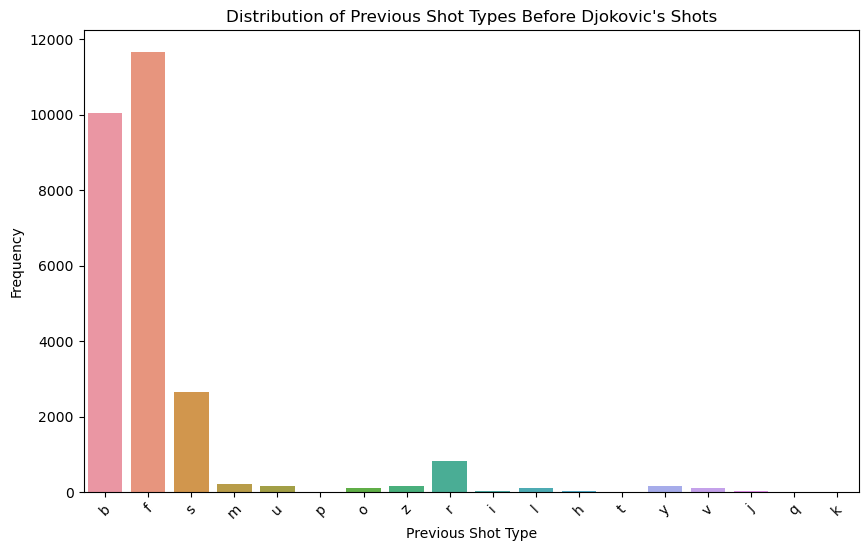

In [57]:
# Visualization 1: Shot Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_djokovic_shots, x='shot_type')
plt.title('Distribution of Djokovic\'s Shot Types')
plt.xlabel('Shot Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

combined_djokovic_shots['previous_shot_type'] = combined_djokovic_shots['previous_shot'].apply(lambda x: x[0] if isinstance(x, str) else 'Unknown')

# Visualization 2: Previous Shot Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_djokovic_shots, x='previous_shot_type')
plt.title('Distribution of Previous Shot Types Before Djokovic\'s Shots')
plt.xlabel('Previous Shot Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


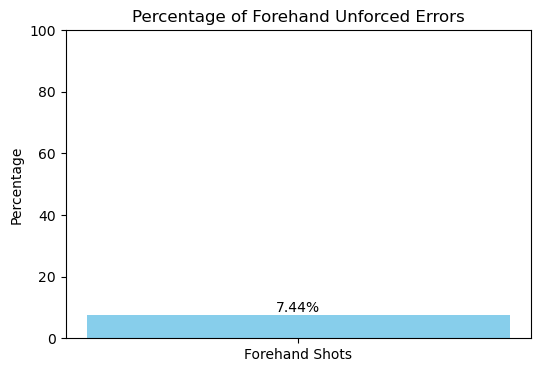

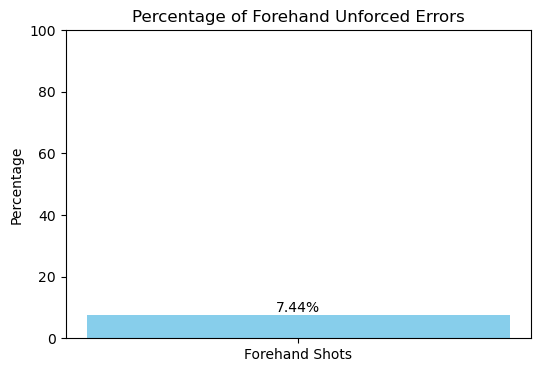

In [58]:
forehand_shots = combined_djokovic_shots[combined_djokovic_shots['shot_type'] == 'f']

forehand_unforced_errors = forehand_shots[forehand_shots['shot_sequence'].str.endswith('@')]

unforced_error_percentage = (len(forehand_unforced_errors) / len(forehand_shots)) * 100

plt.figure(figsize=(6, 4))
bar = plt.bar(['Forehand Shots'], [unforced_error_percentage], color='skyblue')
plt.title('Percentage of Forehand Unforced Errors')
plt.ylabel('Percentage')
plt.ylim(0, 100)  

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{unforced_error_percentage:.2f}%', ha='center', va='bottom')

plt.show()

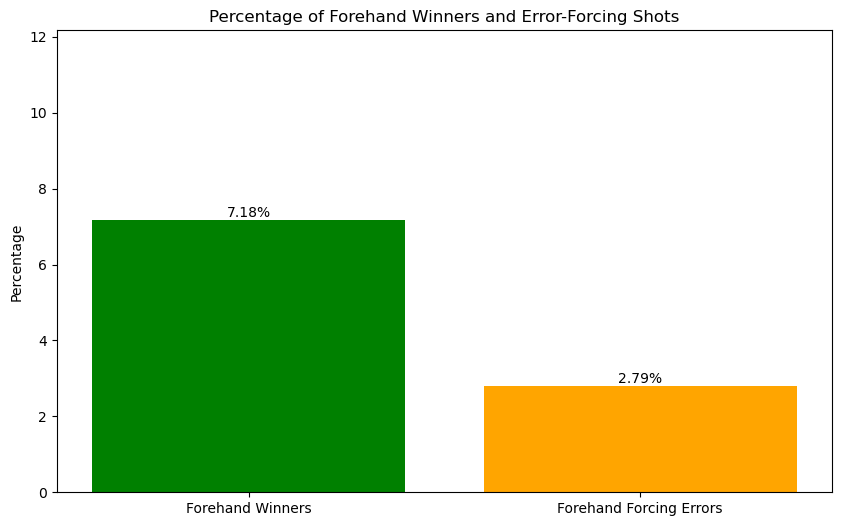

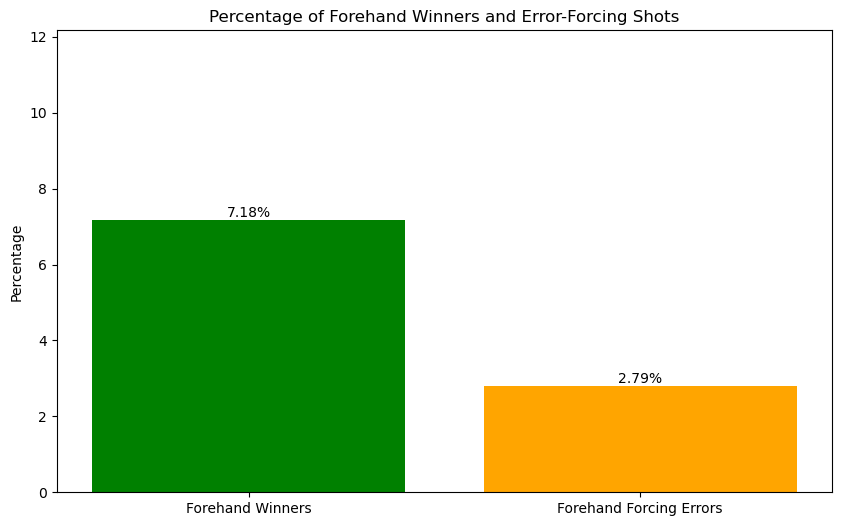

In [59]:
# Identify Winners and Error-Forcing Shots
forehand_winners = forehand_shots[forehand_shots['shot_sequence'].str.endswith('*')]
forehand_forcing_errors = forehand_shots[forehand_shots['shot_sequence'].str.endswith('#')]

# Calculate Percentages
winner_percentage = (len(forehand_winners) / len(forehand_shots)) * 100
forcing_error_percentage = (len(forehand_forcing_errors) / len(forehand_shots)) * 100

# Visualize
plt.figure(figsize=(10, 6))
bar1 = plt.bar(['Forehand Winners'], [winner_percentage], color='green')
bar2 = plt.bar(['Forehand Forcing Errors'], [forcing_error_percentage], color='orange')

plt.title('Percentage of Forehand Winners and Error-Forcing Shots')
plt.ylabel('Percentage')
plt.ylim(0, max(winner_percentage, forcing_error_percentage) + 5)  # Set y-axis limit a bit higher than max value

# Add the text with the percentage on top of each bar
def add_value_labels(bar):
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')

add_value_labels(bar1)
add_value_labels(bar2)

plt.show()

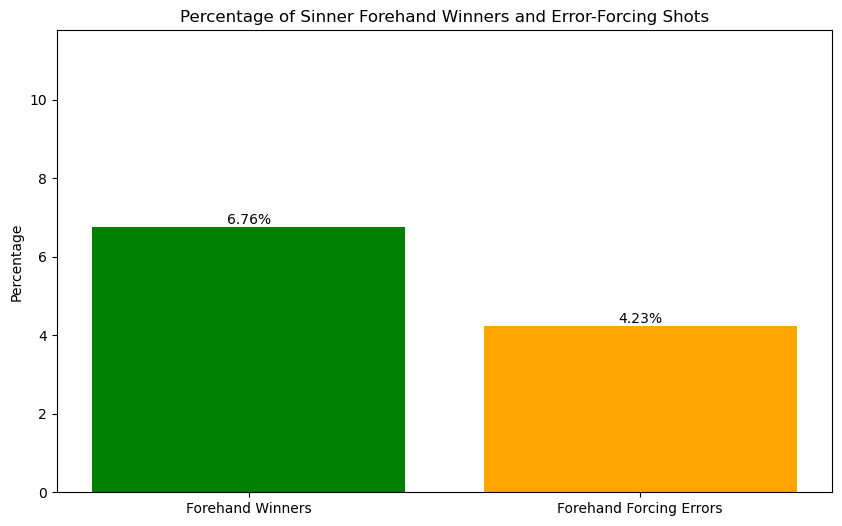

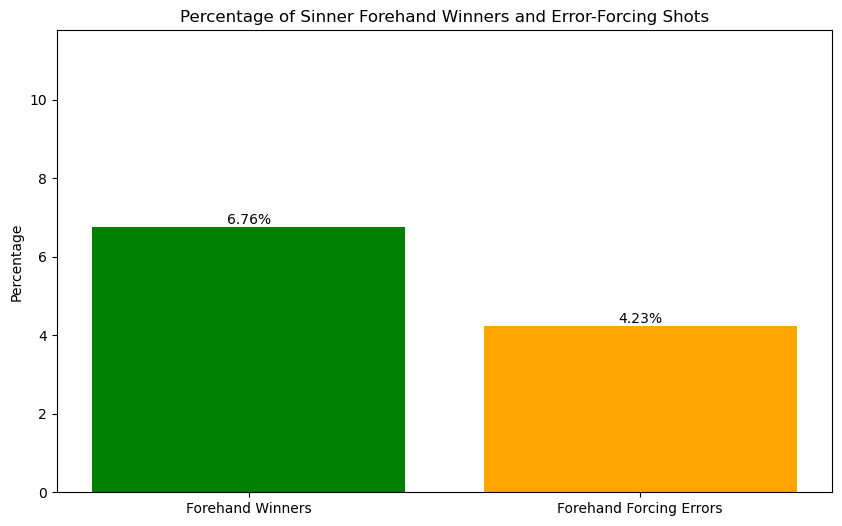

In [60]:
# Assuming combined_sinner_shots is a DataFrame similar to combined_djokovic_shots but for Sinner

# Filter Forehand Shots for Sinner
forehand_shots_sinner = combined_sinner_shots[combined_sinner_shots['shot_type'] == 'f']

# Identify Winners and Error-Forcing Shots for Sinner
forehand_winners_sinner = forehand_shots_sinner[forehand_shots_sinner['shot_sequence'].str.endswith('*')]
forehand_forcing_errors_sinner = forehand_shots_sinner[forehand_shots_sinner['shot_sequence'].str.endswith('#')]

# Calculate Percentages for Sinner
winner_percentage_sinner = (len(forehand_winners_sinner) / len(forehand_shots_sinner)) * 100
forcing_error_percentage_sinner = (len(forehand_forcing_errors_sinner) / len(forehand_shots_sinner)) * 100

# Visualize for Sinner
plt.figure(figsize=(10, 6))
bar1_sinner = plt.bar(['Forehand Winners'], [winner_percentage_sinner], color='green')
bar2_sinner = plt.bar(['Forehand Forcing Errors'], [forcing_error_percentage_sinner], color='orange')

plt.title('Percentage of Sinner Forehand Winners and Error-Forcing Shots')
plt.ylabel('Percentage')
plt.ylim(0, max(winner_percentage_sinner, forcing_error_percentage_sinner) + 5)  # Set y-axis limit a bit higher than max value

# Add the text with the percentage on top of each bar for Sinner
def add_value_labels_sinner(bar):
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')

add_value_labels_sinner(bar1_sinner)
add_value_labels_sinner(bar2_sinner)

plt.show()


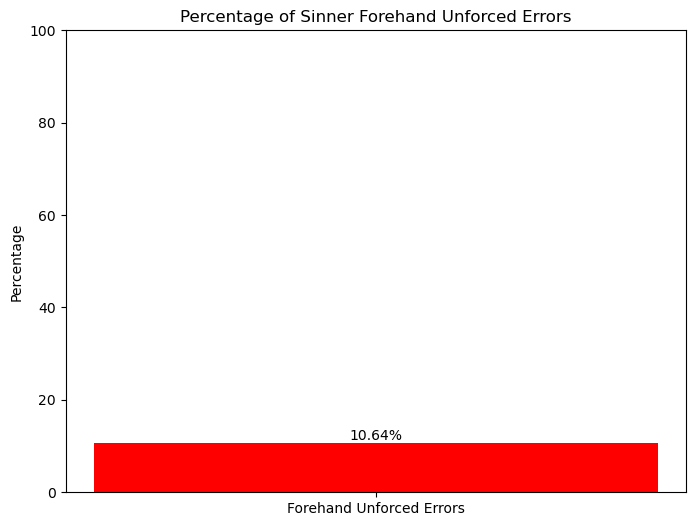

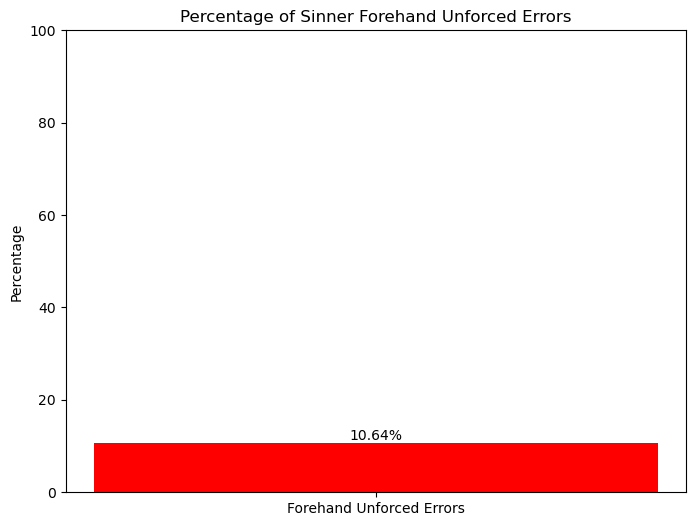

In [61]:
forehand_unforced_errors_sinner = forehand_shots_sinner[forehand_shots_sinner['shot_sequence'].str.endswith('@')]

# Calculate Percentage for Sinner
unforced_error_percentage_sinner = (len(forehand_unforced_errors_sinner) / len(forehand_shots_sinner)) * 100

# Visualize for Sinner
plt.figure(figsize=(8, 6))
bar_sinner = plt.bar(['Forehand Unforced Errors'], [unforced_error_percentage_sinner], color='red')

plt.title('Percentage of Sinner Forehand Unforced Errors')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to 100 for percentage

# Add the text with the percentage on top of the bar for Sinner
for rect in bar_sinner:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')

plt.show()

In [62]:
# Define the outcomes
outcomes = {
    'point_winner': lambda x: x.endswith('*') or x.endswith('#'),  # Winner or error-forcing shots
    'unforced_error': lambda x: x.endswith('@'),  # Unforced errors
    'in_play': lambda x: not x.endswith(('*', '#', '@'))  # The shot remained in play
}

# Initialize a DataFrame to hold the combined data
shot_probs_djokovic = pd.DataFrame()

# Iterate over each unique previous shot type
for prev_shot in combined_djokovic_shots['previous_shot'].unique():
    if pd.isna(prev_shot):
        continue  # Skip NaN values

    # Filter shots by previous shot type
    shots_after_prev_shot = combined_djokovic_shots[combined_djokovic_shots['previous_shot'] == prev_shot]

    # Calculate total occurrences of each shot type after this precedent shot for normalization
    shot_type_totals = shots_after_prev_shot['shot_type'].value_counts().to_dict()

    # Total shots after this precedent shot
    total_shots_after_prev_shot = shots_after_prev_shot.shape[0]

    # Calculate probabilities for each shot type after the previous shot
    for shot_type, count in shot_type_totals.items():
        # Filter shots by shot type
        shot_type_data = shots_after_prev_shot[shots_after_prev_shot['shot_type'] == shot_type]

        # Calculate the number of each outcome
        outcome_counts = {outcome: shot_type_data['shot_sequence'].apply(func).sum() for outcome, func in outcomes.items()}

        # Calculate and append the probabilities along with happening_probability
        happening_probability = count / total_shots_after_prev_shot
        new_row = {
            'precedent_shot': prev_shot,
            'shot_type': shot_type,
            'point_winner': outcome_counts.get('point_winner', 0) / count,
            'unforced_error': outcome_counts.get('unforced_error', 0) / count,
            'in_play': outcome_counts.get('in_play', 0) / count,
            'happening_probability': happening_probability
        }
        shot_probs_djokovic = shot_probs_djokovic.append(new_row, ignore_index=True)

In [63]:
shot_probs_djokovic

,precedent_shot,shot_type,point_winner,unforced_error,in_play,happening_probability
0,b19,f,0.096774,0.096774,0.806452,0.837838
1,b19,r,0.285714,0.000000,0.714286,0.126126
2,b19,l,0.333333,0.000000,0.666667,0.027027
3,b19,u,1.000000,0.000000,0.000000,0.009009
4,b2,f,0.049042,0.081226,0.869732,0.531352
...,...,...,...,...,...,...
978,p27,h,1.000000,0.000000,0.000000,0.500000
979,v39,b,0.000000,0.000000,1.000000,1.000000
980,j=29,b,0.000000,0.000000,1.000000,1.000000
981,u+27,b,0.000000,0.000000,1.000000,1.000000


,precedent_shot,shot_type,point_winner,unforced_error,in_play,happening_probability
0,b19,f,0.096774,0.096774,0.806452,0.837838
1,b19,r,0.285714,0.000000,0.714286,0.126126
2,b19,l,0.333333,0.000000,0.666667,0.027027
3,b19,u,1.000000,0.000000,0.000000,0.009009
4,b2,f,0.049042,0.081226,0.869732,0.531352
...,...,...,...,...,...,...
978,p27,h,1.000000,0.000000,0.000000,0.500000
979,v39,b,0.000000,0.000000,1.000000,1.000000
980,j=29,b,0.000000,0.000000,1.000000,1.000000
981,u+27,b,0.000000,0.000000,1.000000,1.000000


In [64]:
sequence_counts = combined_djokovic_shots.groupby(['shot_type', 'shot_sequence']).size().reset_index(name='counts')

# Calculate total counts for each shot type for normalization
total_counts_by_type = sequence_counts.groupby('shot_type')['counts'].transform('sum')

# Calculate probability of each shot sequence within its shot type
sequence_counts['probability'] = sequence_counts['counts'] / total_counts_by_type

# Now, 'sequence_counts' DataFrame includes the probability of each specific shot sequence within each shot type
sequence_probs_djokovic = sequence_counts[['shot_type', 'shot_sequence', 'probability']]

In [65]:
sequence_probs_djokovic

,shot_type,shot_sequence,probability
0,b,b,0.010813
1,b,b!#,0.000105
2,b,b!29,0.000105
3,b,b!3#,0.000105
4,b,b#,0.001050
...,...,...,...
845,z,z^3n@,0.005333
846,z,z^3w@,0.002667
847,z,zn#,0.005333
848,z,zn@,0.002667


,shot_type,shot_sequence,probability
0,b,b,0.010813
1,b,b!#,0.000105
2,b,b!29,0.000105
3,b,b!3#,0.000105
4,b,b#,0.001050
...,...,...,...
845,z,z^3n@,0.005333
846,z,z^3w@,0.002667
847,z,zn#,0.005333
848,z,zn@,0.002667


In [66]:
djokovic_returns['shot_type'] = djokovic_returns['return_shot_sequence'].str[0]
sinner_returns['shot_type'] = sinner_returns['return_shot_sequence'].str[0]

In [67]:
# First, categorize each return shot based on its outcome
def categorize_outcome(sequence):
    if sequence.endswith('*') or sequence.endswith('#'):
        return 'point_winner'
    elif sequence.endswith('@'):
        return 'unforced_error'
    else:
        return 'in_play'

djokovic_returns['outcome'] = djokovic_returns['return_shot_sequence'].apply(categorize_outcome)

# Group by 'preceding_serve' and 'shot_type', and calculate the outcome counts
outcome_counts = djokovic_returns.groupby(['preceding_serve', 'shot_type', 'outcome']).size().unstack(fill_value=0).reset_index()

# Calculate total counts for each shot type after each serve type for normalization
outcome_counts['total'] = outcome_counts[['point_winner', 'unforced_error', 'in_play']].sum(axis=1)

# Calculate probabilities
outcome_counts['point_winner_prob'] = outcome_counts['point_winner'] / outcome_counts['total']
outcome_counts['unforced_error_prob'] = outcome_counts['unforced_error'] / outcome_counts['total']
outcome_counts['in_play_prob'] = outcome_counts['in_play'] / outcome_counts['total']

# Calculate the happening_probability for each shot type given a serve
total_shots_by_serve = djokovic_returns.groupby('preceding_serve')['shot_type'].count().reset_index(name='total_shots')
outcome_counts = outcome_counts.merge(total_shots_by_serve, on='preceding_serve')
outcome_counts['happening_probability'] = outcome_counts['total'] / outcome_counts['total_shots']

# Select and rename columns for the final DataFrame
return_probs_djokovic = outcome_counts[['preceding_serve', 'shot_type', 'point_winner_prob', 'unforced_error_prob', 'in_play_prob', 'happening_probability']]


In [68]:
return_probs_djokovic

,preceding_serve,shot_type,point_winner_prob,unforced_error_prob,in_play_prob,happening_probability
0,4,b,0.122680,0.037934,0.839387,0.440768
1,4,f,0.242298,0.028310,0.729392,0.427250
2,4,l,0.000000,0.000000,1.000000,0.000711
3,4,m,0.285714,0.000000,0.714286,0.002490
4,4,q,0.000000,0.000000,1.000000,0.000356
5,4,r,0.242647,0.000000,0.757353,0.048381
6,4,s,0.355556,0.000000,0.644444,0.080043
7,5,b,0.061433,0.054608,0.883959,0.538933
8,5,f,0.099711,0.053468,0.846821,0.424280
9,5,m,0.000000,0.000000,1.000000,0.000613


,preceding_serve,shot_type,point_winner_prob,unforced_error_prob,in_play_prob,happening_probability
0,4,b,0.122680,0.037934,0.839387,0.440768
1,4,f,0.242298,0.028310,0.729392,0.427250
2,4,l,0.000000,0.000000,1.000000,0.000711
3,4,m,0.285714,0.000000,0.714286,0.002490
4,4,q,0.000000,0.000000,1.000000,0.000356
5,4,r,0.242647,0.000000,0.757353,0.048381
6,4,s,0.355556,0.000000,0.644444,0.080043
7,5,b,0.061433,0.054608,0.883959,0.538933
8,5,f,0.099711,0.053468,0.846821,0.424280
9,5,m,0.000000,0.000000,1.000000,0.000613


In [69]:
return_sequence_counts = djokovic_returns.groupby(['shot_type', 'return_shot_sequence']).size().reset_index(name='counts')

# Calculate total counts for each shot type for normalization
total_counts_by_type = return_sequence_counts.groupby('shot_type')['counts'].transform('sum')

# Calculate probability of each shot sequence within its shot type
return_sequence_counts['probability'] = return_sequence_counts['counts'] / total_counts_by_type

# Select relevant columns for the final DataFrame
return_sequence_prob_djokovic = return_sequence_counts[['shot_type', 'return_shot_sequence', 'probability']]

In [70]:
return_sequence_prob_djokovic

,shot_type,return_shot_sequence,probability
0,b,b,0.011171
1,b,b!#,0.000319
2,b,b#,0.002873
3,b,b*,0.000638
4,b,b+2,0.000638
...,...,...,...
212,s,s3n#,0.023850
213,s,s3w#,0.025554
214,s,s3x#,0.005111
215,s,sd#,0.003407


,shot_type,return_shot_sequence,probability
0,b,b,0.011171
1,b,b!#,0.000319
2,b,b#,0.002873
3,b,b*,0.000638
4,b,b+2,0.000638
...,...,...,...
212,s,s3n#,0.023850
213,s,s3w#,0.025554
214,s,s3x#,0.005111
215,s,sd#,0.003407


In [71]:
novak_first_serves

,match_id,serve_sequence
0,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,6
1,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,4n
2,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,4d
3,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,6
4,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,4
...,...,...
7568,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,4
7569,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,6
7570,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,4
7571,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,6*


,match_id,serve_sequence
0,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,6
1,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,4n
2,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,4d
3,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,6
4,20230908-M-US_Open-SF-Novak_Djokovic_-Ben_Shelton,4
...,...,...
7568,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,4
7569,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,6
7570,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,4
7571,20200111-M-ATP_Cup-SF-Novak_Djokovic-Daniil_Me...,6*


In [94]:
novak_first_serves['serve_type'] = novak_first_serves['serve_sequence'].str[0]

# Step 2: Categorize each serve based on its outcome
def categorize_serve_outcome(sequence):
    if 'n' in sequence or 'd' in sequence:
        return 'fault'
    elif sequence.endswith('*'):
        return 'ace_or_forcing_error'
    else:
        return 'in_game'

novak_first_serves['outcome'] = novak_first_serves['serve_sequence'].apply(categorize_serve_outcome)

# Step 3: Calculate probabilities for each serve type and outcome
serve_outcome_counts = novak_first_serves.groupby(['serve_type', 'outcome']).size().reset_index(name='counts')
total_serves_by_type = novak_first_serves['serve_type'].value_counts().reset_index(name='total')
total_serves_by_type.columns = ['serve_type', 'total']
serve_outcome_counts = pd.merge(serve_outcome_counts, total_serves_by_type, on='serve_type')
serve_outcome_counts['probability'] = serve_outcome_counts['counts'] / serve_outcome_counts['total']

# Pivot serve_outcome_counts for outcome probabilities
serve_probabilities = serve_outcome_counts.pivot(index='serve_type', columns='outcome', values='probability').reset_index()
serve_probabilities.fillna(0, inplace=True)  # Fill NaNs with 0

# Calculate serve type distribution for serve type probability
serve_type_distribution = novak_first_serves['serve_type'].value_counts(normalize=True).reset_index()
serve_type_distribution.columns = ['serve_type', 'serve_type_probability']

# Merge the serve type probability with the outcome probabilities
first_serve_probabilities_novak = pd.merge(serve_probabilities, serve_type_distribution, on='serve_type')
first_serve_probabilities_novak = first_serve_probabilities_novak[first_serve_probabilities_novak['serve_type'].isin(['4', '5', '6'])]

In [95]:
first_serve_probabilities_novak

,serve_type,ace_or_forcing_error,fault,in_game,serve_type_probability
1,4,0.066961,0.252411,0.680628,0.479202
2,5,0.000000,0.227414,0.772586,0.042387
3,6,0.090936,0.276110,0.632953,0.439984


,serve_type,ace_or_forcing_error,fault,in_game,serve_type_probability
1,4,0.066961,0.252411,0.680628,0.479202
2,5,0.000000,0.227414,0.772586,0.042387
3,6,0.090936,0.276110,0.632953,0.439984


In [77]:
# Define the outcomes
outcomes = {
    'point_winner': lambda x: x.endswith('*') or x.endswith('#'),  # Winner or error-forcing shots
    'unforced_error': lambda x: x.endswith('@'),  # Unforced errors
    'in_play': lambda x: not x.endswith(('*', '#', '@'))  # The shot remained in play
}

# Initialize a DataFrame to hold the combined data
shot_probs_sinner = pd.DataFrame()

# Iterate over each unique previous shot type
for prev_shot in combined_sinner_shots['previous_shot'].unique():
    if pd.isna(prev_shot):
        continue  # Skip NaN values

    # Filter shots by previous shot type
    shots_after_prev_shot = combined_sinner_shots[combined_sinner_shots['previous_shot'] == prev_shot]

    # Calculate total occurrences of each shot type after this precedent shot for normalization
    shot_type_totals = shots_after_prev_shot['shot_type'].value_counts().to_dict()

    # Total shots after this precedent shot
    total_shots_after_prev_shot = shots_after_prev_shot.shape[0]

    # Calculate probabilities for each shot type after the previous shot
    for shot_type, count in shot_type_totals.items():
        # Filter shots by shot type
        shot_type_data = shots_after_prev_shot[shots_after_prev_shot['shot_type'] == shot_type]

        # Calculate the number of each outcome
        outcome_counts = {outcome: shot_type_data['shot_sequence'].apply(func).sum() for outcome, func in outcomes.items()}

        # Calculate and append the probabilities along with happening_probability
        happening_probability = count / total_shots_after_prev_shot
        new_row = {
            'precedent_shot': prev_shot,
            'shot_type': shot_type,
            'point_winner': outcome_counts.get('point_winner', 0) / count,
            'unforced_error': outcome_counts.get('unforced_error', 0) / count,
            'in_play': outcome_counts.get('in_play', 0) / count,
            'happening_probability': happening_probability
        }
        shot_probs_sinner = shot_probs_sinner.append(new_row, ignore_index=True)

In [78]:
shot_probs_sinner

,precedent_shot,shot_type,point_winner,unforced_error,in_play,happening_probability
0,f28,f,0.060284,0.115248,0.824468,0.616393
1,f28,b,0.021084,0.105422,0.873494,0.362842
2,f28,u,0.384615,0.000000,0.615385,0.014208
3,f28,y,0.500000,0.000000,0.500000,0.002186
4,f28,v,0.500000,0.000000,0.500000,0.002186
...,...,...,...,...,...,...
853,b-18,f,0.000000,0.000000,1.000000,1.000000
854,o,b,0.000000,0.000000,1.000000,1.000000
855,v,f,1.000000,0.000000,0.000000,1.000000
856,f!38,b,0.000000,0.000000,1.000000,1.000000


,precedent_shot,shot_type,point_winner,unforced_error,in_play,happening_probability
0,f28,f,0.060284,0.115248,0.824468,0.616393
1,f28,b,0.021084,0.105422,0.873494,0.362842
2,f28,u,0.384615,0.000000,0.615385,0.014208
3,f28,y,0.500000,0.000000,0.500000,0.002186
4,f28,v,0.500000,0.000000,0.500000,0.002186
...,...,...,...,...,...,...
853,b-18,f,0.000000,0.000000,1.000000,1.000000
854,o,b,0.000000,0.000000,1.000000,1.000000
855,v,f,1.000000,0.000000,0.000000,1.000000
856,f!38,b,0.000000,0.000000,1.000000,1.000000


In [79]:
sequence_counts = combined_sinner_shots.groupby(['shot_type', 'shot_sequence']).size().reset_index(name='counts')

# Calculate total counts for each shot type for normalization
total_counts_by_type = sequence_counts.groupby('shot_type')['counts'].transform('sum')

# Calculate probability of each shot sequence within its shot type
sequence_counts['probability'] = sequence_counts['counts'] / total_counts_by_type

# Now, 'sequence_counts' DataFrame includes the probability of each specific shot sequence within each shot type
sequence_probs_sinner = sequence_counts[['shot_type', 'shot_sequence', 'probability']]

In [80]:
sequence_probs_sinner

,shot_type,shot_sequence,probability
0,b,b,0.011781
1,b,b!#,0.000099
2,b,b!1#,0.000396
3,b,b!1@,0.000099
4,b,b!29,0.000099
...,...,...,...
837,z,z^37,0.010204
838,z,z^37*,0.023810
839,z,z^3n@,0.010204
840,z,zn#,0.006803


,shot_type,shot_sequence,probability
0,b,b,0.011781
1,b,b!#,0.000099
2,b,b!1#,0.000396
3,b,b!1@,0.000099
4,b,b!29,0.000099
...,...,...,...
837,z,z^37,0.010204
838,z,z^37*,0.023810
839,z,z^3n@,0.010204
840,z,zn#,0.006803


In [81]:
# First, categorize each return shot based on its outcome
def categorize_outcome(sequence):
    if sequence.endswith('*') or sequence.endswith('#'):
        return 'point_winner'
    elif sequence.endswith('@'):
        return 'unforced_error'
    else:
        return 'in_play'

sinner_returns['outcome'] = sinner_returns['return_shot_sequence'].apply(categorize_outcome)

# Group by 'preceding_serve' and 'shot_type', and calculate the outcome counts
outcome_counts = sinner_returns.groupby(['preceding_serve', 'shot_type', 'outcome']).size().unstack(fill_value=0).reset_index()

# Calculate total counts for each shot type after each serve type for normalization
outcome_counts['total'] = outcome_counts[['point_winner', 'unforced_error', 'in_play']].sum(axis=1)

# Calculate probabilities
outcome_counts['point_winner_prob'] = outcome_counts['point_winner'] / outcome_counts['total']
outcome_counts['unforced_error_prob'] = outcome_counts['unforced_error'] / outcome_counts['total']
outcome_counts['in_play_prob'] = outcome_counts['in_play'] / outcome_counts['total']

# Calculate the happening_probability for each shot type given a serve
total_shots_by_serve = sinner_returns.groupby('preceding_serve')['shot_type'].count().reset_index(name='total_shots')
outcome_counts = outcome_counts.merge(total_shots_by_serve, on='preceding_serve')
outcome_counts['happening_probability'] = outcome_counts['total'] / outcome_counts['total_shots']

# Select and rename columns for the final DataFrame
return_probs_sinner = outcome_counts[['preceding_serve', 'shot_type', 'point_winner_prob', 'unforced_error_prob', 'in_play_prob', 'happening_probability']]


In [82]:
return_probs_sinner

,preceding_serve,shot_type,point_winner_prob,unforced_error_prob,in_play_prob,happening_probability
0,4,b,0.158402,0.042011,0.799587,0.508581
1,4,f,0.216706,0.033097,0.750197,0.444483
2,4,l,0.000000,0.000000,1.000000,0.000350
3,4,m,0.666667,0.000000,0.333333,0.002102
4,4,r,0.500000,0.000000,0.500000,0.006305
5,4,s,0.568807,0.000000,0.431193,0.038179
6,5,b,0.086385,0.061972,0.851643,0.618467
7,5,f,0.100313,0.065831,0.833856,0.370499
8,5,r,0.200000,0.000000,0.800000,0.008711
9,5,s,0.000000,0.000000,1.000000,0.002323


,preceding_serve,shot_type,point_winner_prob,unforced_error_prob,in_play_prob,happening_probability
0,4,b,0.158402,0.042011,0.799587,0.508581
1,4,f,0.216706,0.033097,0.750197,0.444483
2,4,l,0.000000,0.000000,1.000000,0.000350
3,4,m,0.666667,0.000000,0.333333,0.002102
4,4,r,0.500000,0.000000,0.500000,0.006305
5,4,s,0.568807,0.000000,0.431193,0.038179
6,5,b,0.086385,0.061972,0.851643,0.618467
7,5,f,0.100313,0.065831,0.833856,0.370499
8,5,r,0.200000,0.000000,0.800000,0.008711
9,5,s,0.000000,0.000000,1.000000,0.002323


In [83]:
return_sequence_counts = sinner_returns.groupby(['shot_type', 'return_shot_sequence']).size().reset_index(name='counts')

# Calculate total counts for each shot type for normalization
total_counts_by_type = return_sequence_counts.groupby('shot_type')['counts'].transform('sum')

# Calculate probability of each shot sequence within its shot type
return_sequence_counts['probability'] = return_sequence_counts['counts'] / total_counts_by_type

# Select relevant columns for the final DataFrame
return_sequence_prob_sinner = return_sequence_counts[['shot_type', 'return_shot_sequence', 'probability']]

In [84]:
return_sequence_prob_sinner

,shot_type,return_shot_sequence,probability
0,b,b,0.005505
1,b,b!#,0.000275
2,b,b!1#,0.001101
3,b,b!19,0.000275
4,b,b!2#,0.001101
...,...,...,...
231,s,s3n#,0.025830
232,s,s3w#,0.022140
233,s,s3x#,0.007380
234,s,sn#,0.003690


,shot_type,return_shot_sequence,probability
0,b,b,0.005505
1,b,b!#,0.000275
2,b,b!1#,0.001101
3,b,b!19,0.000275
4,b,b!2#,0.001101
...,...,...,...
231,s,s3n#,0.025830
232,s,s3w#,0.022140
233,s,s3x#,0.007380
234,s,sn#,0.003690


In [96]:
sinner_first_serves['serve_type'] = sinner_first_serves['serve_sequence'].str[0]

# Step 2: Categorize each serve based on its outcome
def categorize_serve_outcome(sequence):
    if 'n' in sequence or 'd' in sequence:
        return 'fault'
    elif sequence.endswith('*'):
        return 'ace_or_forcing_error'
    else:
        return 'in_game'

sinner_first_serves['outcome'] = sinner_first_serves['serve_sequence'].apply(categorize_serve_outcome)

# Step 3: Calculate probabilities for each serve type and outcome
serve_outcome_counts = sinner_first_serves.groupby(['serve_type', 'outcome']).size().reset_index(name='counts')
total_serves_by_type = sinner_first_serves['serve_type'].value_counts().reset_index(name='total')
total_serves_by_type.columns = ['serve_type', 'total']
serve_outcome_counts = pd.merge(serve_outcome_counts, total_serves_by_type, on='serve_type')
serve_outcome_counts['probability'] = serve_outcome_counts['counts'] / serve_outcome_counts['total']

# Pivot serve_outcome_counts for outcome probabilities
serve_probabilities = serve_outcome_counts.pivot(index='serve_type', columns='outcome', values='probability').reset_index()
serve_probabilities.fillna(0, inplace=True)  # Fill NaNs with 0

# Calculate serve type distribution for serve type probability
serve_type_distribution = sinner_first_serves['serve_type'].value_counts(normalize=True).reset_index()
serve_type_distribution.columns = ['serve_type', 'serve_type_probability']

# Merge the serve type probability with the outcome probabilities
first_serve_probabilities_sinner = pd.merge(serve_probabilities, serve_type_distribution, on='serve_type')
first_serve_probabilities_sinner = first_serve_probabilities_sinner[first_serve_probabilities_sinner['serve_type'].isin(['4', '5', '6'])]

In [97]:
first_serve_probabilities_sinner

,serve_type,ace_or_forcing_error,fault,in_game,serve_type_probability
1,4,0.067090,0.284625,0.648285,0.503970
2,5,0.001346,0.290713,0.707941,0.095159
3,6,0.087185,0.337885,0.574930,0.365779


,serve_type,ace_or_forcing_error,fault,in_game,serve_type_probability
1,4,0.067090,0.284625,0.648285,0.503970
2,5,0.001346,0.290713,0.707941,0.095159
3,6,0.087185,0.337885,0.574930,0.365779


In [99]:
sinner_second_serves['serve_type'] = sinner_second_serves['serve_sequence'].str[0]

# Reuse the same function to categorize serve outcome
sinner_second_serves['outcome'] = sinner_second_serves['serve_sequence'].apply(categorize_serve_outcome)

# Calculate probabilities for each serve type and outcome for second serves
serve_outcome_counts = sinner_second_serves.groupby(['serve_type', 'outcome']).size().reset_index(name='counts')
total_serves_by_type = sinner_second_serves['serve_type'].value_counts().reset_index(name='total')
total_serves_by_type.columns = ['serve_type', 'total']

# Merge to get total serves in the outcome counts DataFrame for second serves
serve_outcome_counts = pd.merge(serve_outcome_counts, total_serves_by_type, on='serve_type')
serve_outcome_counts['probability'] = serve_outcome_counts['counts'] / serve_outcome_counts['total']

# Pivot serve_outcome_counts for outcome probabilities for second serves
serve_probabilities = serve_outcome_counts.pivot(index='serve_type', columns='outcome', values='probability').reset_index()
serve_probabilities.fillna(0, inplace=True)  # Fill NaNs with 0 for second serves

# Calculate serve type distribution for serve type probability for second serves
serve_type_distribution = sinner_second_serves['serve_type'].value_counts(normalize=True).reset_index()
serve_type_distribution.columns = ['serve_type', 'serve_type_probability']

# Merge the serve type probability with the outcome probabilities for second serves
second_serve_probabilities_sinner = pd.merge(serve_probabilities, serve_type_distribution, on='serve_type')
second_serve_probabilities_sinner = second_serve_probabilities_sinner[second_serve_probabilities_sinner['serve_type'].isin(['4', '5', '6'])]

second_serve_probabilities_sinner


,serve_type,ace_or_forcing_error,fault,in_game,serve_type_probability
0,4,0.006460,0.073643,0.919897,0.242102
1,5,0.000504,0.068079,0.931417,0.620269
2,6,0.004914,0.076167,0.918919,0.127307


,serve_type,ace_or_forcing_error,fault,in_game,serve_type_probability
0,4,0.006460,0.073643,0.919897,0.242102
1,5,0.000504,0.068079,0.931417,0.620269
2,6,0.004914,0.076167,0.918919,0.127307


In [100]:
novak_second_serves['serve_type'] = novak_second_serves['serve_sequence'].str[0]

# Reuse the same function to categorize serve outcome
novak_second_serves['outcome'] = novak_second_serves['serve_sequence'].apply(categorize_serve_outcome)

# Calculate probabilities for each serve type and outcome for second serves
serve_outcome_counts = novak_second_serves.groupby(['serve_type', 'outcome']).size().reset_index(name='counts')
total_serves_by_type = novak_second_serves['serve_type'].value_counts().reset_index(name='total')
total_serves_by_type.columns = ['serve_type', 'total']

# Merge to get total serves in the outcome counts DataFrame for second serves
serve_outcome_counts = pd.merge(serve_outcome_counts, total_serves_by_type, on='serve_type')
serve_outcome_counts['probability'] = serve_outcome_counts['counts'] / serve_outcome_counts['total']

# Pivot serve_outcome_counts for outcome probabilities for second serves
serve_probabilities = serve_outcome_counts.pivot(index='serve_type', columns='outcome', values='probability').reset_index()
serve_probabilities.fillna(0, inplace=True)  # Fill NaNs with 0 for second serves

# Calculate serve type distribution for serve type probability for second serves
serve_type_distribution = novak_second_serves['serve_type'].value_counts(normalize=True).reset_index()
serve_type_distribution.columns = ['serve_type', 'serve_type_probability']

# Merge the serve type probability with the outcome probabilities for second serves
second_serve_probabilities_novak = pd.merge(serve_probabilities, serve_type_distribution, on='serve_type')
second_serve_probabilities_novak = second_serve_probabilities_novak[second_serve_probabilities_novak['serve_type'].isin(['4', '5', '6'])]

second_serve_probabilities_novak


,serve_type,ace_or_forcing_error,fault,in_game,serve_type_probability
0,4,0.005669,0.078231,0.916100,0.339623
1,5,0.000000,0.047794,0.952206,0.314209
2,6,0.022989,0.091954,0.885057,0.335002


,serve_type,ace_or_forcing_error,fault,in_game,serve_type_probability
0,4,0.005669,0.078231,0.916100,0.339623
1,5,0.000000,0.047794,0.952206,0.314209
2,6,0.022989,0.091954,0.885057,0.335002


In [101]:
shot_probs_djokovic.to_csv('shot_probs_djokovic.csv', index=False)
sequence_probs_djokovic.to_csv('sequence_probs_djokovic.csv', index=False)
return_probs_djokovic.to_csv('return_probs_djokovic.csv', index=False)
return_sequence_prob_djokovic.to_csv('return_sequence_prob_djokovic.csv', index=False)
first_serve_probabilities_novak.to_csv('first_serve_probabilities_novak.csv', index=False)
second_serve_probabilities_novak.to_csv('second_serve_probabilities_novak.csv', index=False)
shot_probs_sinner.to_csv('shot_probs_sinner.csv', index=False)
sequence_probs_sinner.to_csv('sequence_probs_sinner.csv', index=False)
return_probs_sinner.to_csv('return_probs_sinner.csv', index=False)
return_sequence_prob_sinner.to_csv('return_sequence_prob_sinner.csv', index=False)
first_serve_probabilities_sinner.to_csv('first_serve_probabilities_sinner.csv', index=False)
second_serve_probabilities_sinner.to_csv('second_serve_probabilities_sinner.csv', index=False)
